## Change Working Directory

The notebooks are stored in a subfolder, therefore when running the notebook in the editor, we need to change the working directory from its current folder to its parent folder

We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Bartek\\Desktop\\Predictive-Analysis\\jupyter_notebooks'

- We use os.path.dirname() to get the parent directory
- Then we call the os.chir() function, which defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

# Load Data

In [3]:
import pandas as pd
loan_data_drop = pd.read_csv("outputs/loan_data_drop.csv")
loan_data_mean = pd.read_csv("outputs/loan_data_mean.csv")

databases = [loan_data_drop, loan_data_mean]

We noticed that the database consists of objects and some float/int values. We will need to convert these values so that we can run a machine learning algorithms on the data.

In [4]:
for loan_data in databases:
    loan_data['Married'] = loan_data['Married'].map({'No': 0, 'Yes': 1})
    loan_data['Gender'] = loan_data['Gender'].map({'Female': 0, 'Male': 1})
    loan_data['Education'] = loan_data['Education'].map({'Not Graduate': 0, 'Graduate': 1})
    loan_data['Self_Employed'] = loan_data['Self_Employed'].map({'No': 0, 'Yes': 1})
    loan_data['Property_Area'] = loan_data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
    loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'N': 0, 'Y': 1})
    loan_data['Dependents'] = loan_data['Dependents'].map({'0': 0, '1' : 1, '2': 1, '3+': 2})
    loan_data.info()
    loan_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    int64  
 2   Married            381 non-null    int64  
 3   Dependents         381 non-null    int64  
 4   Education          381 non-null    int64  
 5   Self_Employed      381 non-null    int64  
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    int64  
 12  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 38.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Co

There was too many accepted loans in the database therefore we need to make the dataset balanced so that we prevent the model to over fitting to one variable. This code utilizes the RandomOverSampler from the imbalanced-learn library to address class imbalance in machine learning datasets. It iterates through a list of databases, drops unnecessary columns, performs oversampling, and constructs resampled datasets, appending them to a list for further analysis.

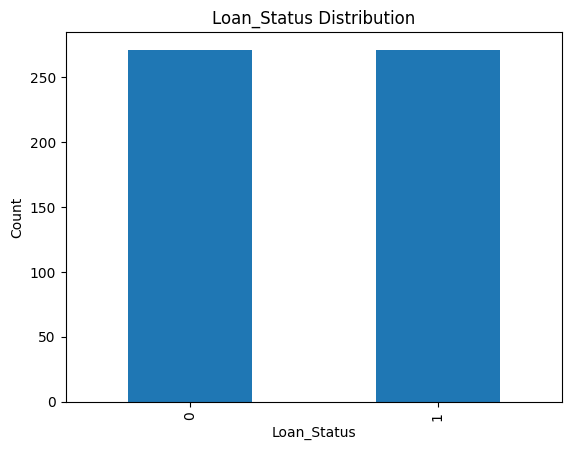

In [5]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

ros = RandomOverSampler(random_state=42)

resampled_databases = []
for data in databases:
    data.drop(columns=['Loan_ID'], inplace=True)
    X = data.drop(columns=['Loan_Status'])
    y = data['Loan_Status']
    X_resampled, y_resampled = ros.fit_resample(X, y)
    resampled_data = pd.concat([pd.DataFrame(X_resampled),
                                pd.DataFrame(y_resampled,columns=['Loan_Status'])], axis=1)
    resampled_databases.append(resampled_data)

resampled_data['Loan_Status'].value_counts().plot(kind='bar')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Loan_Status Distribution')
plt.show()



Resample datasets and evaluate the performance of multiple classifiers, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and K-Nearest Neighbors, on each dataset. I will prepare the data by extracting features and target variables, splits the dataset into training and testing sets, trains each classifier on the training data, and evaluates its accuracy on the test set. If a classifier achieves an accuracy greater than 0.8, it prints out the classifier's name and its corresponding accuracy. This process helps identify classifiers that perform well on imbalanced datasets, particularly after applying resampling techniques to address class imbalances.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a list of classifiers to test
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}



for data in resampled_databases:
    X = data.drop(columns=['Loan_Status'])  # Assuming 'target_column' is your target variable
    y = data['Loan_Status']  # Assuming 'target_column' is your target variable

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and test each classifier
    for clf_name, clf in classifiers.items():
        #print(f"Training and testing {clf_name}...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > 0.8:
            print(f"Accuracy of {clf_name}: {accuracy:.4f}")
            print("-" * 50)
            print(classification_report(y_test, y_pred))

c:\Users\Bartek\Desktop\Predictive-Analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Decision Tree: 0.9083
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        55
           1       0.92      0.89      0.91        54

    accuracy                           0.91       109
   macro avg       0.91      0.91      0.91       109
weighted avg       0.91      0.91      0.91       109

Accuracy of Random Forest: 0.9358
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.93      0.94      0.94        54

    accuracy                           0.94       109
   macro avg       0.94      0.94      0.94       109
weighted avg       0.94      0.94      0.94       109



c:\Users\Bartek\Desktop\Predictive-Analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Decision Tree: 0.8991
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        55
           1       0.92      0.87      0.90        54

    accuracy                           0.90       109
   macro avg       0.90      0.90      0.90       109
weighted avg       0.90      0.90      0.90       109

Accuracy of Random Forest: 0.9174
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        55
           1       0.92      0.91      0.92        54

    accuracy                           0.92       109
   macro avg       0.92      0.92      0.92       109
weighted avg       0.92      0.92      0.92       109





This code loads a dataset named loan_data from a CSV file, converts the `Loan_Status` column values from 'Y' and 'N' to 1 and 0 respectively. Then, it identifies numerical columns in the dataset and calculates the Spearman correlation coefficients between these numerical columns and the 'Loan_Status' column, selecting the top 10 most correlated features (excluding the 'Loan_Status' column itself). Next, it creates a list of the top 3 most positively and negatively correlated features with the 'Loan_Status' column, and filters the original datasets in resampled_databases to only include these selected features along with the `Loan_Status` column. Finally, it stores these filtered datasets in the filtered_loan_databases list and displays the result.

In [44]:
loan_data = pd.read_csv("outputs/loan_data.csv")
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})
numerical_columns = loan_data.select_dtypes(include=['float', 'int']).columns
corr_spearman = loan_data[numerical_columns].corr(method='spearman')['Loan_Status'].sort_values(key=abs, ascending=False)[1:].head(10)
import_variables = list(set(corr_spearman[:3].index.to_list() + corr_spearman[:3].index.to_list()))
filtered_loan_databases = []

for loan_data in resampled_databases:
    filtered_loan_databases.append(loan_data[import_variables + ['Loan_Status']])

filtered_loan_databases


[     Credit_History  CoapplicantIncome  LoanAmount  Loan_Status
 0          1.000000             1508.0       128.0            0
 1          1.000000                0.0        66.0            1
 2          1.000000             2358.0       120.0            1
 3          1.000000                0.0       141.0            1
 4          1.000000             1516.0        95.0            1
 ..              ...                ...         ...          ...
 537        0.000000                0.0        66.0            0
 538        1.000000                0.0        71.0            0
 539        0.000000             4266.0       132.0            0
 540        1.000000                0.0         9.0            0
 541        0.837607                0.0       128.0            0
 
 [542 rows x 4 columns],
      Credit_History  CoapplicantIncome  LoanAmount  Loan_Status
 0          1.000000             1508.0       128.0            0
 1          1.000000                0.0        66.0            

In [47]:
for data in filtered_loan_databases:
    X = data.drop(columns=['Loan_Status'])  # Assuming 'target_column' is your target variable
    y = data['Loan_Status']  # Assuming 'target_column' is your target variable

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a list of classifiers to test


    # Train and test each classifier
    for clf_name, clf in classifiers.items():
        #print(f"Training and testing {clf_name}...")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > 0.8:
            print(f"Accuracy of {clf_name}: {accuracy:.4f}")
            print("-" * 50)
            print(classification_report(y_test, y_pred))

Accuracy of Decision Tree: 0.8349
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        55
           1       0.89      0.76      0.82        54

    accuracy                           0.83       109
   macro avg       0.84      0.83      0.83       109
weighted avg       0.84      0.83      0.83       109

Accuracy of Random Forest: 0.8716
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        55
           1       0.90      0.83      0.87        54

    accuracy                           0.87       109
   macro avg       0.87      0.87      0.87       109
weighted avg       0.87      0.87      0.87       109

Accuracy of Decision Tree: 0.8349
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.91   

Utilizing the most correlated columns resulted in a notable decrease in the model's accuracy, underscoring the substantial impact even non-correlated columns have on the determination of whether a loan should be accepted.

## Conclusion

After testing multiple ML model on different databases i have to conclusion that the best model for the problem is the `Random Forest` on the `loan_data_drop` database, with an accuracy score of 0.9358 percent.